In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [25]:
df = pd.read_csv('data/loan_data.csv')
df.head(100)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23.0,male,Associate,145092.0,0,RENT,25600.0,EDUCATION,12.69,0.18,3.0,557,Yes,0
96,24.0,female,Bachelor,15928.0,1,OWN,1600.0,MEDICAL,13.57,0.10,3.0,689,Yes,0
97,22.0,male,Bachelor,73131.0,3,RENT,25475.0,VENTURE,10.99,0.35,3.0,681,No,1
98,25.0,male,Master,281501.0,4,MORTGAGE,20000.0,MEDICAL,14.27,0.07,4.0,623,Yes,0


loan_status                         0      1    All
previous_loan_defaults_on_file                     
No                              12142  10000  22142
Yes                             22858      0  22858
All                             35000  10000  45000


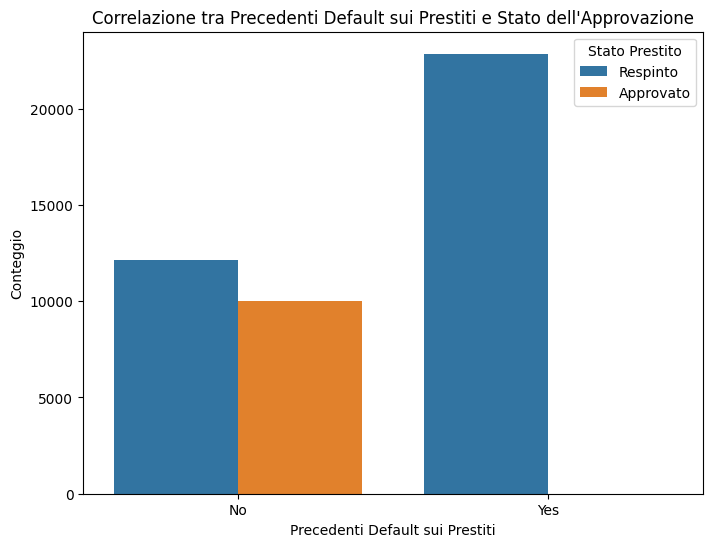

In [28]:
# Creiamo una tabella di contingenza tra previous_loan_defaults_on_file e loan_status
contingenza = pd.crosstab(df['previous_loan_defaults_on_file'], df['loan_status'], margins=True)

# Stampa la tabella di contingenza per visualizzare la distribuzione
print(contingenza)

# Grafico a barre della correlazione tra i default precedenti sui prestiti e lo stato dell'approvazione
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='previous_loan_defaults_on_file', hue='loan_status')
plt.title("Correlazione tra Precedenti Default sui Prestiti e Stato dell'Approvazione")
plt.xlabel("Precedenti Default sui Prestiti")
plt.ylabel("Conteggio")
plt.legend(title="Stato Prestito", loc='upper right', labels=["Respinto", "Approvato"])
plt.show()

In [ ]:
#Conversione da float in int 'person_age' 
df['person_age'] = df['person_age'].astype(int)

In [27]:
df[df['person_emp_exp'] == 0]['person_income']

0         71948.0
1         12282.0
3         79753.0
5         12951.0
9         12739.0
           ...   
44976     36843.0
44982    130495.0
44989     16779.0
44991     37786.0
44992     40925.0
Name: person_income, Length: 9566, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [ ]:
# TODO 
# Grafico a Torta per 'loan_status', 'gender', 'person_education' (dati semplici dentro)
# Istogramma per 'credit_score', e altre variabili numeriche interessanti 


In [ ]:
df['person_education_enc'] = df['person_education'].map({'Bachelor':2,'Master':3})

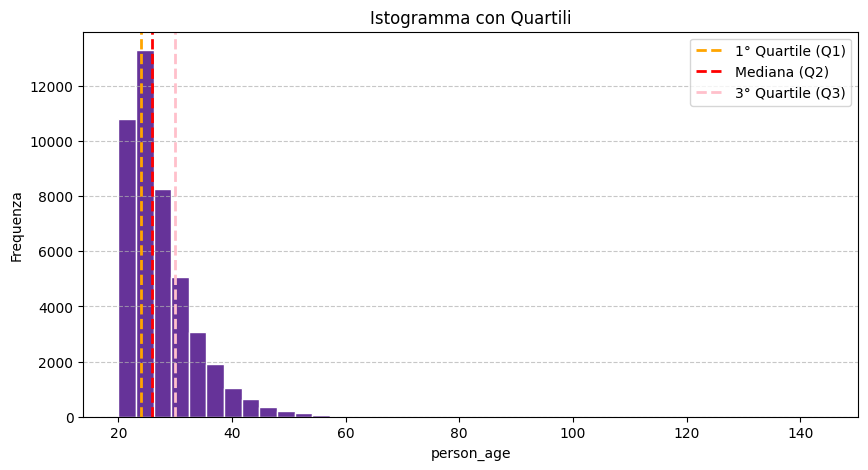

In [ ]:
col_name = 'person_age'
bins = 40
data = df[col_name]
q1, q2, q3 = np.percentile(data, [25, 50, 75])
# Creare l'istogramma
plt.figure(figsize=(10, 5))
plt.hist(data,
         bins=bins,
         color="rebeccapurple",
         edgecolor="white")
# Aggiungere linee per i quartili
plt.axvline(q1, color="orange", linestyle="dashed", linewidth=2, label="1° Quartile (Q1)")
plt.axvline(q2, color="red", linestyle="dashed", linewidth=2, label="Mediana (Q2)")
plt.axvline(q3, color="pink", linestyle="dashed", linewidth=2, label="3° Quartile (Q3)")
# Aggiungere etichette e titolo
plt.xlabel(col_name)
plt.ylabel("Frequenza")
plt.title("Istogramma con Quartili")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Mostrare il grafico
plt.show()

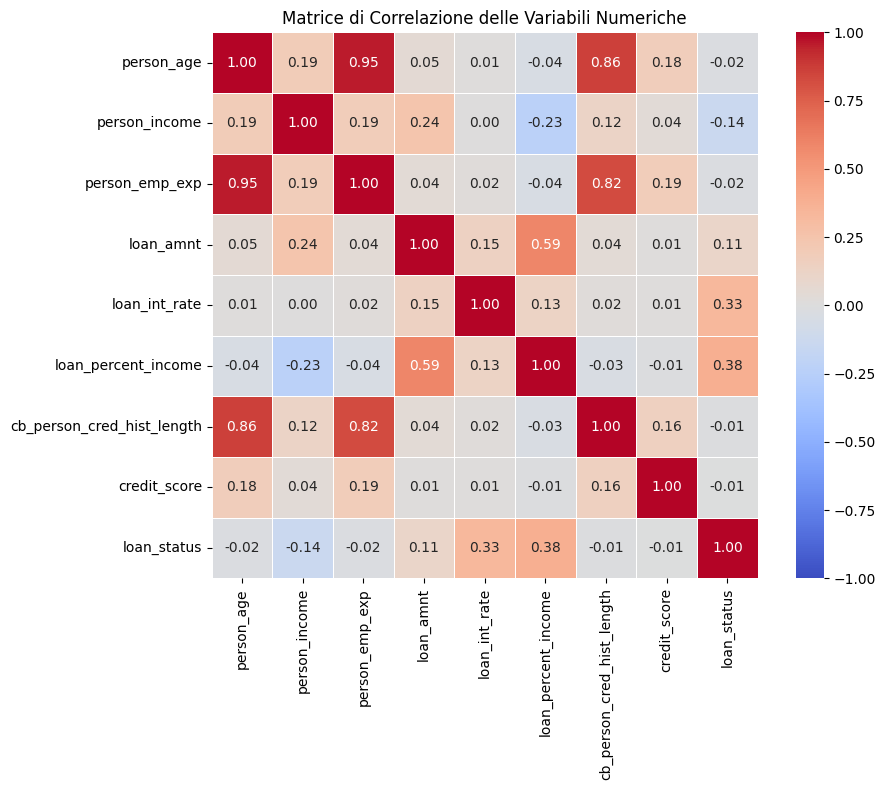

In [10]:
# Filtra le colonne numeriche
df_numerico = df.select_dtypes(include=['number'])

# Calcola la matrice di correlazione
correlazioni = df_numerico.corr()

# Crea il grafico della matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlazioni,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True,
    linewidths=0.5,
    vmin=-1,   # imposta il minimo
    vmax=1     # imposta il massimo
)
plt.title('Matrice di Correlazione delle Variabili Numeriche')
plt.tight_layout()
plt.show()